In [19]:
from IPython.display import HTML
HTML('''<script>
code_show=false; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
 click <a href="javascript:code_toggle()">here</a> to hide the raw code.''')

# list of run parameters
* we fixed vertical uniform field with $\beta=1000$ (channel flow if beta small; under resolved MRI if beta large)
* initial perturbations in velocity at 1% level (shouldn't matter)
* box size takes $2\times4\times1$, $2\times8\times1$, and $4\times4\times1$ 
* resolution varies from $64/H$ to $128/H$
* Pm takes $0.5$ (Re=3000 or 6000), $1$ (Re=3000), and $2$ (Re=3000)
* Most of runs last 50 orbits; 
* the cost for x2y8z1r128ry64 is about 1/3 of x2y8z1r128, about 7 hrs if using 448 cores (16nodes on perseus) ==> if we quadruple the resol to 512/H, the cost would be about two weeks if using 1000 cores. If we only run it to 30 orbits, then we could cut it to one week. 




| Run Name             |   $\alpha_M$  | $\alpha_R$ | $\alpha_{tot}$ | cost ( K cpu hrs / 50 orbits) | 
| -------------------- |:-------------:| :---------:|:---------------:|:-----------------:|
|x4y4z1r64pm0.5re3000  |  0.0511469940865 |0.0249443474978 |0.0760913415843
|**x4y4z1r128pm0.5re3000** | ** 0.0418438402588 **| 0.0206966386107 |0.0625404788695 | 12.36 |
|x2y4z1r64pm0.5re3000  |0.0703778104344   |0.0206471236541 |0.0910249340885
|**x2y4z1r128pm0.5re3000**  |** 0.0529404396322 **|0.017056460866  |0.0699969004982 | 4.288 |
|**x2y4z1r128ry64pm0.5re3000** |**0.0310040468084**  |0.00986708455157 |0.0408711313599 | 1.618 |
|x2y8z1r64pm0.5re3000  |0.0544804060001   |0.0198353895048 |0.0743157955049
|**x2y8z1r128pm0.5re3000** |**0.0581124776119**   |0.0207809470349 |0.0788934246469 | 8.901
|**x2y8z1r128ry64pm0.5re3000** |**0.0543753703691** |0.0195533326243 |0.0739287029934 |3.171
|
|x4y4z1r64pm0.5re6000  |  0.0619593136327 |0.0257535456146 |0.0877128592474
|x4y4z1r128pm0.5re6000 |  0.062770867339  |0.0269143873829 |0.0896852547219 | 13.44|
|
|x4y4z1r64pm1re3000    |  0.070446628165  |0.0279445252382 |0.0983911534032
|x4y4z1r128pm1re3000   |  0.0799633601279 |0.0248594819774 |0.104822842105 |  
|
|x4y4z1r64pm2re3000    |  0.0873193983542 |0.0289556270123 |0.116275025366
|x4y4z1r128pm2re3000   |  0.105155847376  |0.030746347623  |0.135902194999
|x2y4z1r64pm2re3000    |0.12180216258     |0.0302641363206 |0.152066298901
|x2y8z1r64pm2re3000    |0.025865805587    |0.0122733064571 |0.0381391120441





| Run Name             |   $\langle B_x^2\rangle^{1/2}$  | $\langle B_y^2\rangle^{1/2}$ | $\langle B_z^2\rangle^{1/2}$|
| -------------------- |:-------------:| :-------------:|:---------------:|
|x4y4z1r128pm0.5re3000 |  0.18 |0.32 |0.12|
|x2y4z1r64pm0.5re3000  |0.20   |0.47 |0.12|
|x2y4z1r128pm0.5re3000  |   | | |
|x2y4z1r128ry64pm0.5re3000  |   | | |
|x2y8z1r128pm0.5re3000 |0.20   |0.46 |0.12|
|x2y8z1r128ry64pm0.5re3000 |0.17 |0.38 |0.10|

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import athena_read as ath
import my_athena_read as myath
%matplotlib inline
import os.path

## overall turbulent history

* recover the positive correlation between $\alpha$ and Pm for fixed Re (comparing x4y4z1pm0.5re3000,x4y4z1pm1re3000, and x4y4z1pm2re3000) or Rm (comparing x4y4z1pm0.5re6000 and x4y4z1pm1re3000) for fixed $\beta=1000$
* increasing the $L_y/L_x$ raises $\alpha$; increasing $\Delta y/\Delta x$ from $1$ to $2$ significantly affects the turbulent stress of x2y4z1 box, but not too much of the x2y8z1 box
* x2y4z1 boxes tend to have more sporadic bursts than x2y8z1 

<type 'float'>
Run x4y4z1r64pm0.5re3000: <alpha> =  0.0511469940865 0.0249443474978 0.0760913415843
Run x4y4z1r64pm0.5re6000: <alpha> =  0.0619593136327 0.0257535456146 0.0877128592474
Run x4y4z1r64pm1re3000: <alpha> =  0.070446628165 0.0279445252382 0.0983911534032
Run x4y4z1r64pm2re3000: <alpha> =  0.0873193983542 0.0289556270123 0.116275025366
Run x4y4z1r128pm0.5re3000: <alpha> =  0.0420668947238 0.0207633999833 0.0628302947072
Run x4y4z1r128pm0.5re6000: <alpha> =  0.062770867339 0.0269143873829 0.0896852547219
Run x4y4z1r128pm1re3000: <alpha> =  0.0813328658792 0.0255664345523 0.106899300431
Run x4y4z1r128pm2re3000: <alpha> =  0.105155847376 0.030746347623 0.135902194999
Run x2y4z1r128pm0.5re3000: <alpha> =  0.0529404396322 0.017056460866 0.0699969004982
Run x2y4z1r128ry64pm0.5re3000: <alpha> =  0.0620080936167 0.0197341691031 0.0817422627199
Run x2y8z1r128pm0.5re3000: <alpha> =  0.0581124776119 0.0207809470349 0.0788934246469
Run x2y8z1r128ry64pm0.5re3000: <alpha> =  0.05437537036

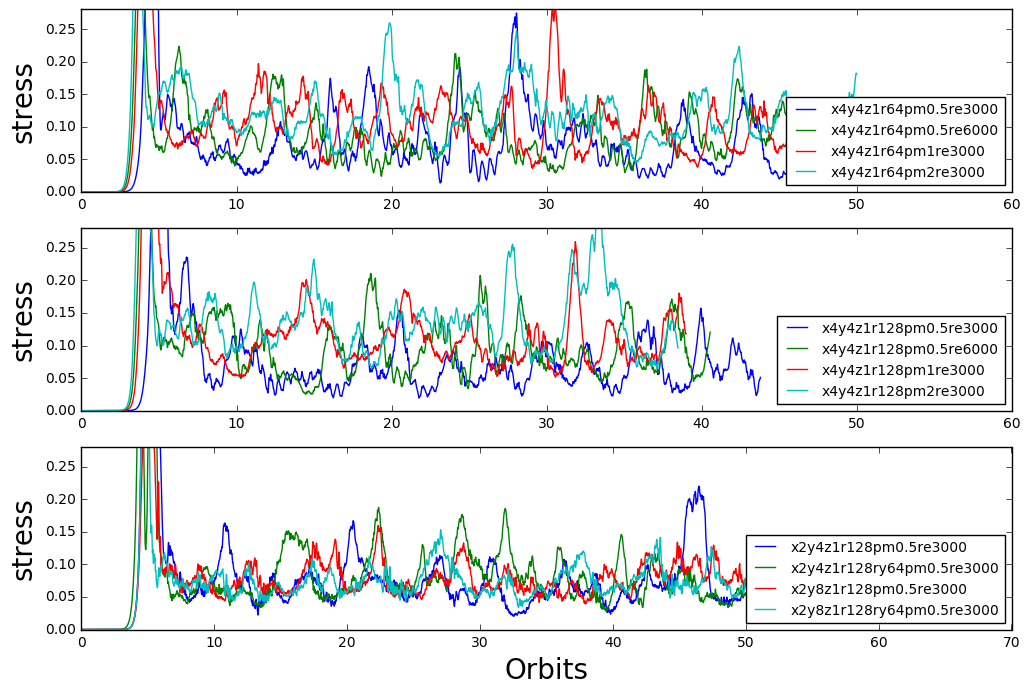

In [21]:
direname='/tigress/jiming/reconnect/athena/bin/'
basename='Unstra.out2.'
appdname='athdf'
histname='Unstra.hst'

omg=1.0
rho0=1.0
cs = 1.0
pres = rho0*cs**2
torb=2.*np.pi/omg

#list of target
targlist=[  'x4y4z1r64pm0.5re3000', 'x4y4z1r64pm0.5re6000',\
            'x4y4z1r64pm1re3000',   'x4y4z1r64pm2re3000',\
            'x4y4z1r128pm0.5re3000','x4y4z1r128pm0.5re6000',\
            'x4y4z1r128pm1re3000',  'x4y4z1r128pm2re3000']
Lx,Ly,Lz=4.0,4.0,1.0
volume= Lx*Ly*Lz
print type(volume)
first_time=True
# load default history dump
matplotlib.rcParams['figure.figsize'] = (12,8)
plt.subplot(3,1,1)
for targname in targlist[:-4]:
    fname=direname+targname+'/'+histname
    dtype1 = np.dtype([('time', 'f8'), ('em1', 'f8'),('em2','f8'),('em3','f8'),('maxwell','f8'),('reynolds','f8')])
    ahist = np.loadtxt(fname, dtype=dtype1, skiprows=2, usecols=(0,9,10,11,12,13))
    plt.plot(ahist['time']/torb,(ahist['maxwell']+ahist['reynolds'])/pres/volume,label=targname)
    size=int(len(ahist['maxwell'])*0.25)
    print 'Run '+targname+': <alpha> = ',np.average(ahist['maxwell'][size:])/pres/volume, \
                                         np.average(ahist['reynolds'][size:])/pres/volume, \
                                         np.average(ahist['maxwell'][size:]+ahist['reynolds'][size:])/pres/volume
    #plt.plot(ahist['time']/torb,ahist['reynolds']/pres/volume,label='reynolds')
#plt.yscale('log')
plt.ylim([0,0.28])
plt.xlim([0,60])
#plt.xlabel('Orbits',fontsize=20)
plt.ylabel('stress',fontsize=20)
plt.legend(fontsize=10,loc=4)

plt.subplot(3,1,2)
for targname in targlist[4:]:
    fname=direname+targname+'/'+histname
    dtype1 = np.dtype([('time', 'f8'), ('em1', 'f8'),('em2','f8'),('em3','f8'),('maxwell','f8'),('reynolds','f8')])
    ahist = np.loadtxt(fname, dtype=dtype1, skiprows=2, usecols=(0,9,10,11,12,13))
    plt.plot(ahist['time']/torb,(ahist['maxwell']+ahist['reynolds'])/pres/volume,label=targname)
    size=int(len(ahist['maxwell'])*0.25)
    print 'Run '+targname+': <alpha> = ',np.average(ahist['maxwell'][size:])/pres/volume, \
                                         np.average(ahist['reynolds'][size:])/pres/volume, \
                                         np.average(ahist['maxwell'][size:]+ahist['reynolds'][size:])/pres/volume
#plt.yscale('log')
plt.ylim([0,0.28])
plt.xlim([0,60])
#plt.xlabel('Orbits',fontsize=20)
plt.ylabel('stress',fontsize=20)
plt.legend(fontsize=10,loc=4)

#==============x2y4z1=================
#list of target
targlist1=[#'x2y4z1r64pm0.5re3000',# 'x2y4z1r64pm2re3000',\
           'x2y4z1r128pm0.5re3000', 'x2y4z1r128ry64pm0.5re3000',\
           #'x2y8z1r64pm0.5re3000', #'x2y8z1r64pm2re3000',\
            'x2y8z1r128pm0.5re3000','x2y8z1r128ry64pm0.5re3000']
Lx,Ly,Lz=2.0,4.0,1.0
volume= Lx*Ly*Lz
# load default history dump
plt.subplot(3,1,3)

for targname in targlist1:
    if targname[0:4] == 'x2y8':
        volume = Lx*Ly*Lz*2 #x2y8z1
    fname=direname+targname+'/'+histname
    dtype1 = np.dtype([('time', 'f8'), ('em1', 'f8'),('em2','f8'),('em3','f8'),('maxwell','f8'),('reynolds','f8')])
    ahist = np.loadtxt(fname, dtype=dtype1, skiprows=2, usecols=(0,9,10,11,12,13))
    plt.plot(ahist['time']/torb,(ahist['maxwell']+ahist['reynolds'])/pres/volume,label=targname)
    size=int(len(ahist['maxwell'])*0.25)
    print 'Run '+targname+': <alpha> = ',np.average(ahist['maxwell'][size:])/pres/volume, \
                                         np.average(ahist['reynolds'][size:])/pres/volume, \
                                         np.average(ahist['maxwell'][size:]+ahist['reynolds'][size:])/pres/volume
plt.ylim([0,0.28])
plt.xlim([0,70])
plt.xlabel('Orbits',fontsize=20)
plt.ylabel('stress',fontsize=20)
plt.legend(fontsize=10,loc=4)



## space-time diagram

* x4y4z1 boxes show strong zonal flows; x2y4z1 and x2y8z1 are less prominent 
* they all show cyclic behavior in $B_y$ indication of dynamo
* less sporadic stress bursts for larger box (x2y8z1 vs. x2y4z1) and/or lower resoltuion (r128 vs r128ry64, 64/H in y)

['x4y4z1r128pm0.5re3000', 'x4y4z1r128pm0.5re6000', 'x2y4z1r128pm0.5re3000', 'x2y4z1r128ry64pm0.5re3000', 'x2y8z1r128pm0.5re3000', 'x2y8z1r128ry64pm0.5re3000']


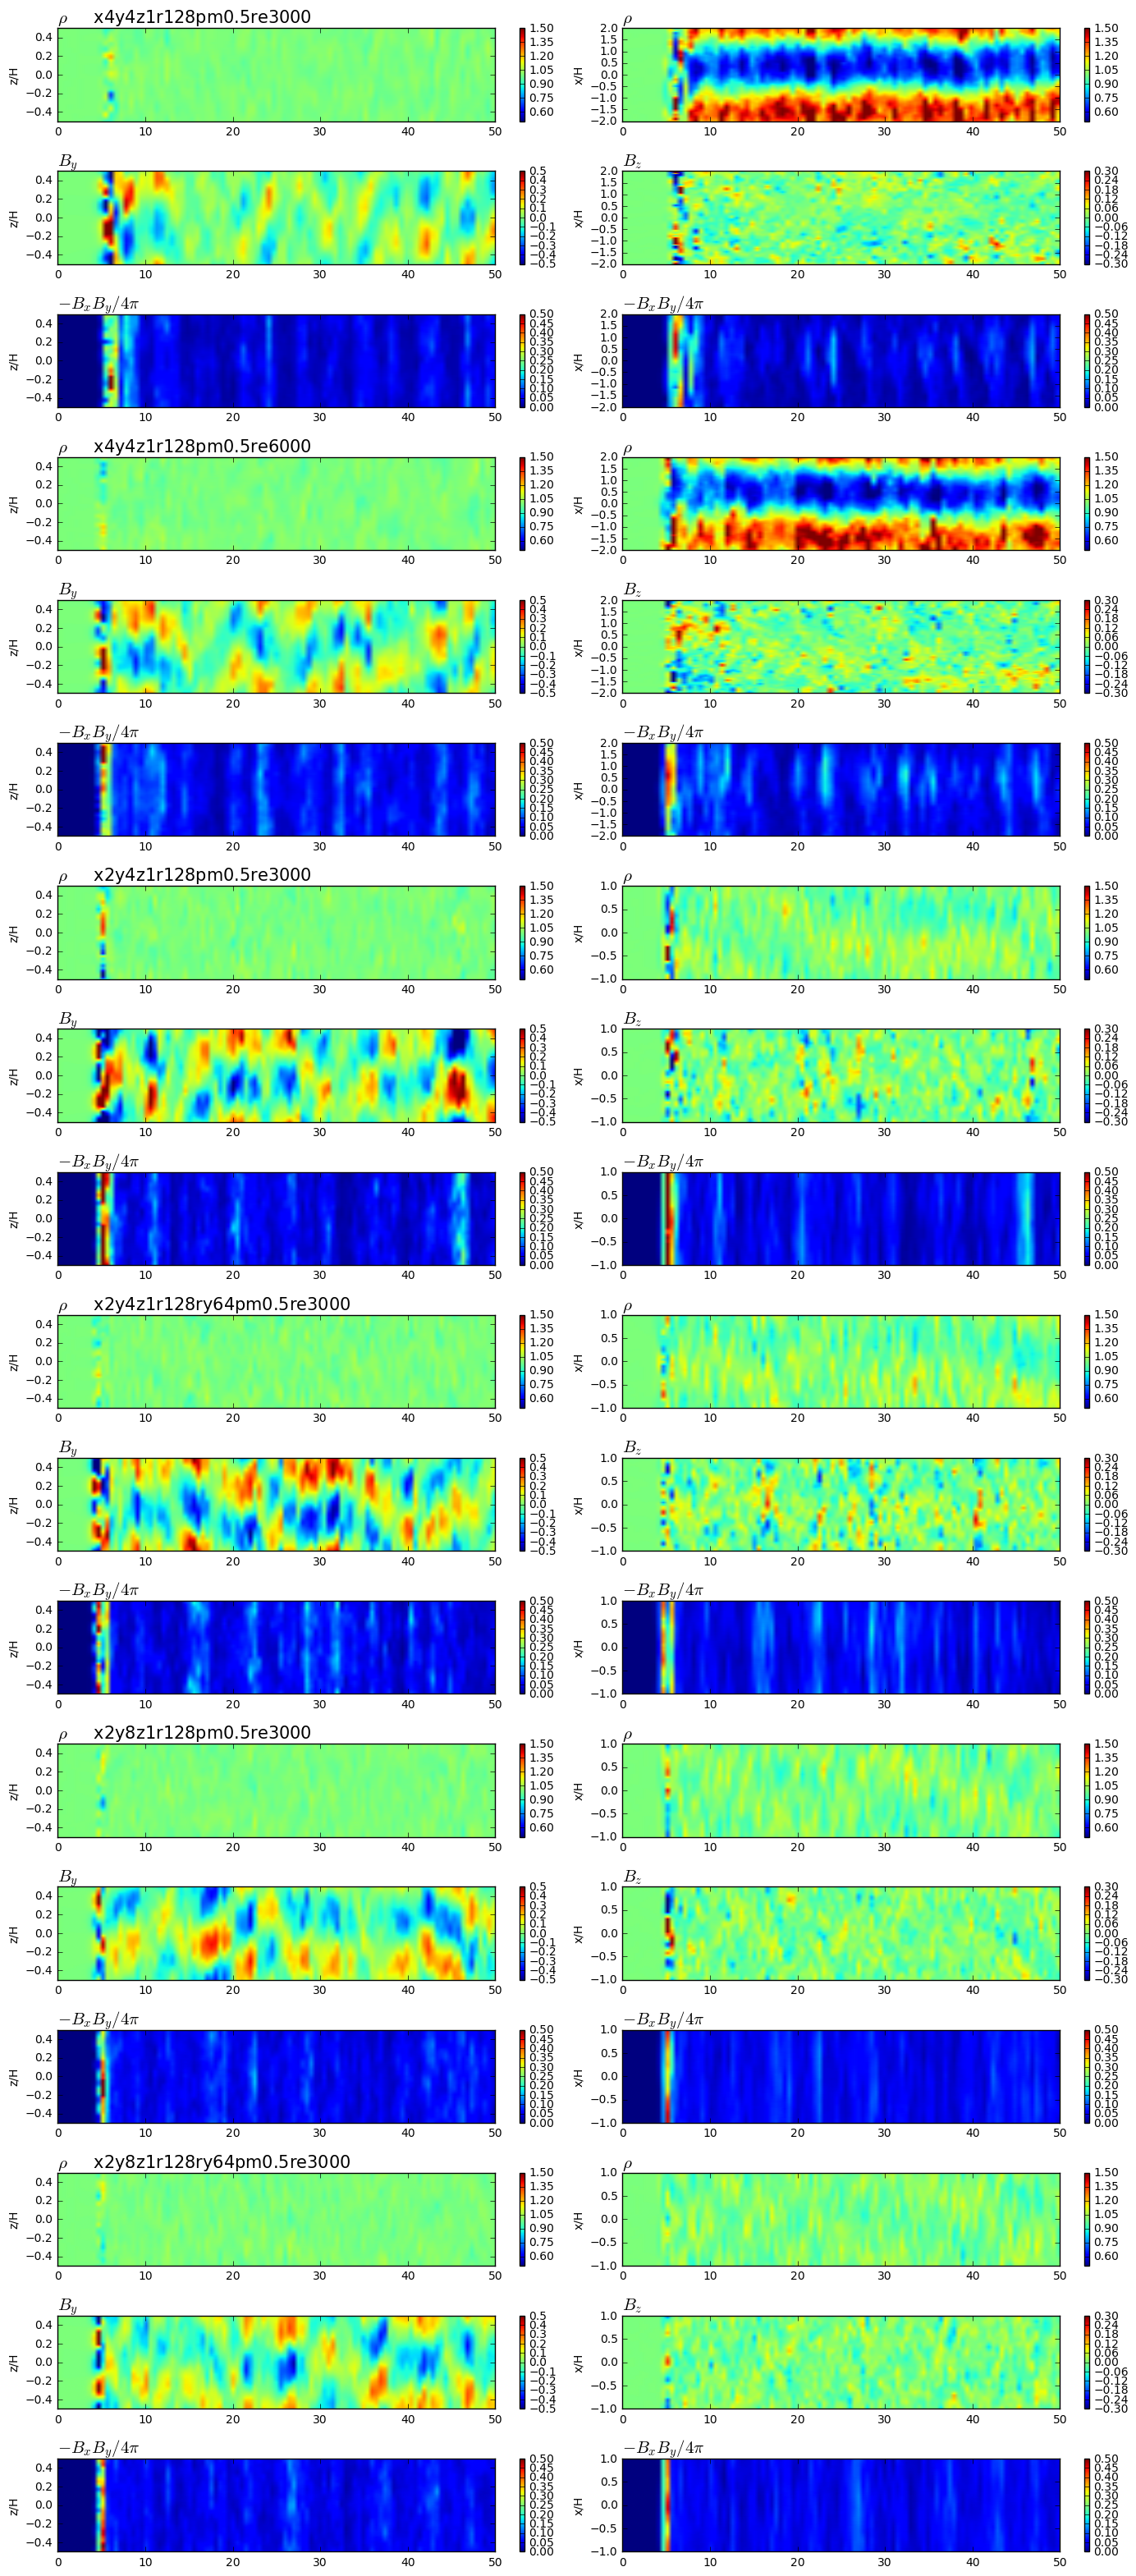

In [22]:
targlist2=['x4y4z1r128pm0.5re3000', 'x4y4z1r128pm0.5re6000',\
           'x2y4z1r128pm0.5re3000','x2y4z1r128ry64pm0.5re3000',\
           'x2y8z1r128pm0.5re3000','x2y8z1r128ry64pm0.5re3000',]

print targlist2
nvar = 3
ncol=2; npanel=len(targlist2);nrow=npanel/ncol*2*nvar;cnt=0
matplotlib.rcParams['figure.figsize'] = (14,14*nrow/ncol/4.0)

for targname in targlist2: 
  first_time = True
  dst = direname+targname+'/'+'tmp/'
  tt = np.loadtxt(dst+'tt.dat')
  xx = np.loadtxt(dst+'xx.dat')
  zz = np.loadtxt(dst+'zz.dat')
  nx = len(xx);nz=len(zz);nt = len(tt)
 
  for i in range(nvar):
    if i==0: 
        title=r'$\rho$';titlex=title;vmin=0.5;vmax=1.5
    if i==1:
        title=r'$B_y$';titlex=r'$B_z$';vmin=-0.5;vmax=0.5
    if i==2:
        title=r'$-B_xB_y/4\pi$';titlex=title;vmin=0;vmax=0.5
    if first_time:
        title=title+'     '+targname
        first_time=False
    have = np.loadtxt(dst+'have'+str(i).zfill(2)+'.dat')
    zave = np.loadtxt(dst+'zave'+str(i).zfill(2)+'.dat')
    # plot space-time diagram
    cnt = cnt+1
    plt.subplot(nrow,ncol,cnt)
    plt.title(title,loc='left',fontsize=15)
    plt.imshow(have,extent=[0,50,-0.5,0.5],aspect='auto',vmin=vmin,vmax=vmax)
    plt.colorbar(orientation='vertical',fraction=0.05,pad=0.05)
    #plt.xlabel('orbits')
    plt.ylabel('z/H')
    cnt=cnt+1
    plt.subplot(nrow,ncol,cnt)
    plt.title(titlex,loc='left',fontsize=15)
    xmin=-2;xmax=2
    if targname[0:2]=='x2':
        xmin=-1;xmax=1
    if i==1:
        vmin=-0.3;vmax=0.3
    plt.imshow(zave,extent=[0,50,xmin,xmax],aspect='auto',vmin=vmin,vmax=vmax)
    plt.ylabel('x/H')
    plt.colorbar(orientation='vertical',fraction=0.05,pad=0.05)
    #cnt=cnt+1
    
plt.tight_layout()


## calculate the correlation length

* from let to right: auto-correlation functions for B, v and $\rho$, which are defined as $\zeta(\Delta \vec x) \equiv \langle Q_i(\vec x) Q_i(\vec x+\Delta \vec x)\rangle $.   
* overall, they all look ok except x4y4z1. x2y8z1 boxes look better
* Note: we only calculate snapshot of the length (at t=60), it might vary over time, so time averages would be more accurate. 



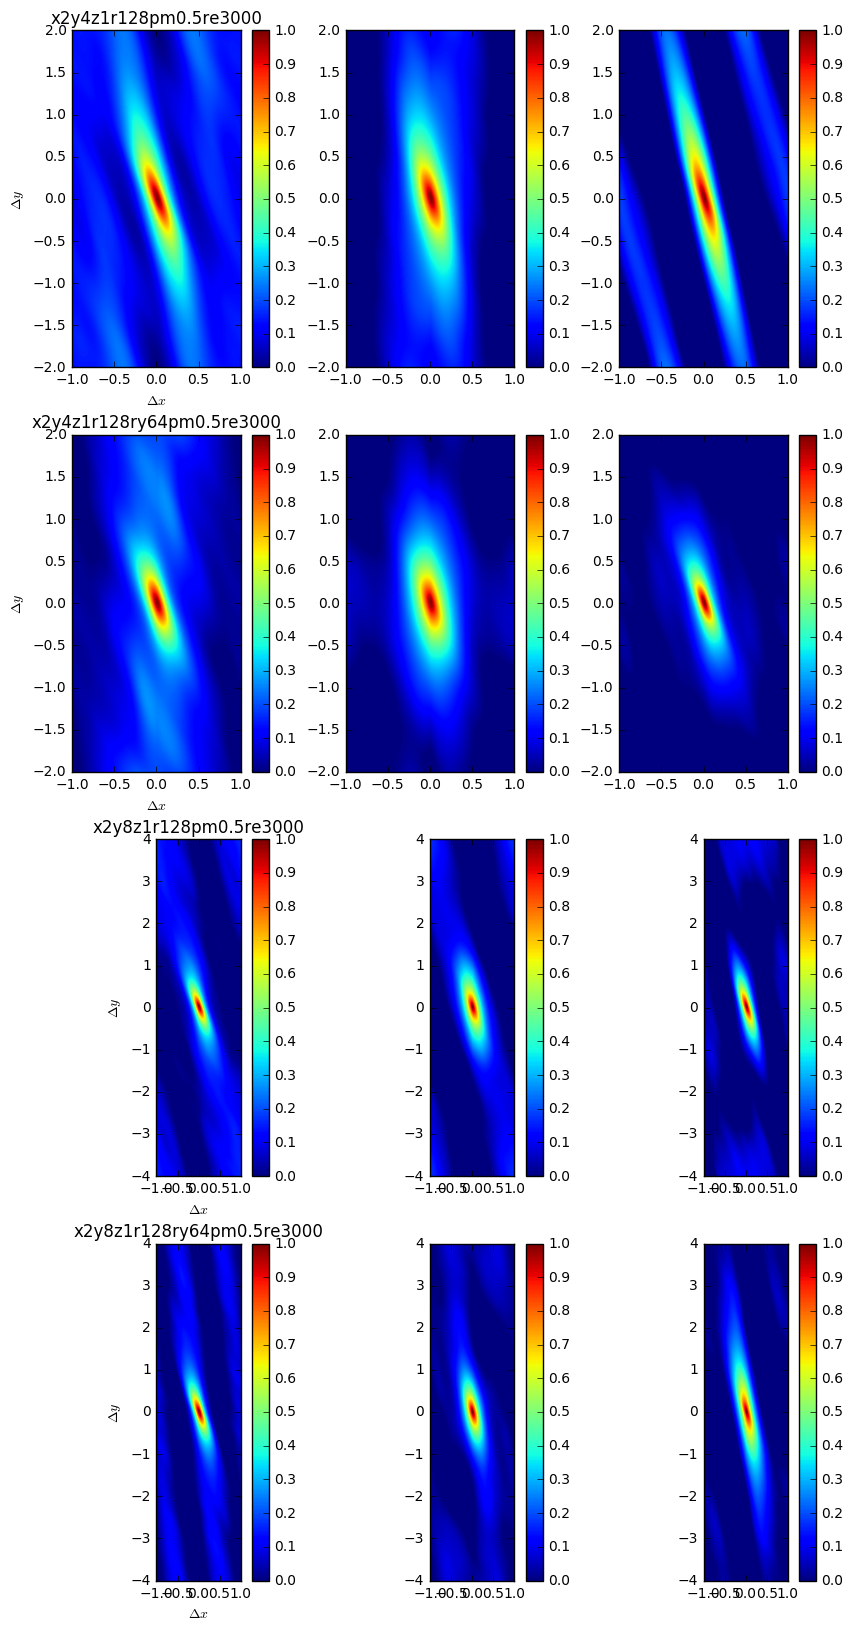

In [23]:
#from scipy import ndimage
from scipy import signal
from scipy.interpolate import interp1d


def autocorr(x):
    y=x-np.average(x)
    pad = np.array(y.shape)
    dim = y.ndim
    ps = np.abs(np.fft.fftn(y))
    ps *= ps
    ac = np.real(np.fft.ifftn(ps))
    if dim == 1:
        ac = np.roll(ac,pad[0]/2)/pad[0]
    if dim == 2:
        ac = np.roll(np.roll(ac,pad[0]/2,axis=0),pad[1]/2,axis=1)/(pad[0]*pad[1])
    if dim == 3:
        ac = np.roll(np.roll(np.roll(ac,pad[0]/2,axis=0),pad[1]/2,axis=1),pad[2]/2,axis=2)/(pad[0]*pad[1]*pad[2])
    if dim > 3:
        print "autocorr: input array has to be 1, 2, or 3-dim"
        return
    return ps,ac

def refine_y(coarse,factor):
    if coarse.ndim != 3:
        print "refine_y: input has to be 3-dim"
        return
    elif factor <= 1.0:
        return coarse
    else:
        nsize = np.array(coarse.shape)
        n1,n2,n3 = nsize[0],nsize[1],nsize[2]
        x = np.arange(0,n2,1)
        xnew = np.linspace(0,n2-1,num=factor*n2,endpoint=True)
        f = interp1d(x, coarse, axis=1, kind='linear')
        fine = np.zeros((n1,n2*factor,n3))
        count = 0
        for index in xnew:
           fine[:,count,:] = f(index)
           count +=1
    return fine
    
# read in a 3d snapshot 
targlist = ['x2y4z1r128pm0.5re3000','x2y4z1r128ry64pm0.5re3000',\
            'x2y8z1r128pm0.5re3000','x2y8z1r128ry64pm0.5re3000']
q=1.5;omg=1.0

matplotlib.rcParams['figure.figsize'] = (10,5*4)

cnt = 1;nrow=4;ncol=3
for targname in targlist:
  fname=direname+targname+'/'+'Unstra.out2.00060.athdf'
  time,data = myath.athdf(fname)
  xx = data['x1f']
  xx = xx + 0.5*(xx[1]-xx[0])
  xx = xx[:-1]
  nx,ny,nz = data['rho'].shape[2],data['rho'].shape[1],data['rho'].shape[0]
  factor = 1
  if (targname[10:14]=='ry64'):
    factor = 2 # dble
  tmp = refine_y(data['rho'],factor)
  ps,ac_rho = autocorr(tmp-np.average(tmp))
  ps,ac1 = autocorr(refine_y(data['Bcc1'],factor))
  ps,ac2 = autocorr(refine_y(data['Bcc2'],factor))
  ps,ac3 = autocorr(refine_y(data['Bcc3'],factor))
  ac_bcc = ac1+ac2+ac3
  ps,ac1 = autocorr(refine_y(data['vel1'],factor))
  vshear = q*omg*np.resize(xx,(nz,ny*factor,nx))
  ps,ac2 = autocorr(refine_y(data['vel2'],factor)+vshear)
  ps,ac3 = autocorr(refine_y(data['vel3'],factor))
  ac_vel = ac1+ac2+ac3
  extent = [-1,1,-2,2]
  if(targname[2:4]=='y8'):
    extent = [-1,1,-4,4]
  plt.subplot(nrow,ncol,cnt) 
  plt.imshow(ac_bcc[63,:,:]/np.max(ac_bcc),origin='lower',vmin=0,vmax=1.0,cmap='jet',extent=extent)
  plt.colorbar()
  plt.title(targname)
  plt.xlabel(r'$\Delta x$')
  plt.ylabel(r'$\Delta y$')
  cnt +=1
  plt.subplot(nrow,ncol,cnt)
  plt.imshow(ac_vel[63,:,:]/np.max(ac_vel),origin='lower',vmin=0,vmax=1.0,cmap='jet',extent=extent)
  plt.colorbar()
  cnt += 1
  plt.subplot(nrow,ncol,cnt)
  plt.imshow(ac_rho[63,:,:]/np.max(ac_rho),origin='lower',vmin=0,vmax=1.0,cmap='jet',extent=extent)
  plt.colorbar()
  cnt +=1

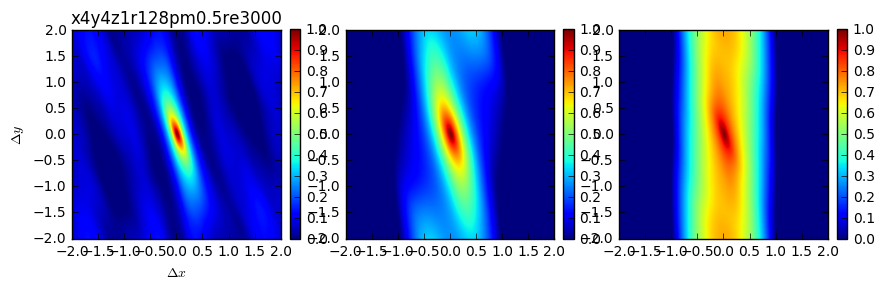

In [24]:
targlist = ['x4y4z1r128pm0.5re3000']
cnt = 1;nrow=1;ncol=3
fraction=0.046;pad=0.04
for targname in targlist[0:]:
  fname=direname+targname+'/'+'Unstra.out2.00060.athdf'
  time,data = myath.athdf(fname)
  xx = data['x1f']
  xx = xx + 0.5*(xx[1]-xx[0])
  xx = xx[:-1]
  nx,ny,nz = data['rho'].shape[2],data['rho'].shape[1],data['rho'].shape[0]
  factor = 1
  if (targname[10:14]=='ry64'):
    factor = 2 # dble
  tmp = refine_y(data['rho'],factor)
  ps,ac_rho = autocorr(tmp-np.average(tmp))
  ps,ac1 = autocorr(refine_y(data['Bcc1'],factor))
  ps,ac2 = autocorr(refine_y(data['Bcc2'],factor))
  ps,ac3 = autocorr(refine_y(data['Bcc3'],factor))
  ac_bcc = ac1+ac2+ac3
  ps,ac1 = autocorr(refine_y(data['vel1'],factor))
  vshear = q*omg*np.resize(xx,(nz,ny*factor,nx))
  ps,ac2 = autocorr(refine_y(data['vel2'],factor)+vshear)
  ps,ac3 = autocorr(refine_y(data['vel3'],factor))
  ac_vel = ac1+ac2+ac3
  extent = [-2,2,-2,2]

  plt.subplot(nrow,ncol,cnt) 
  plt.imshow(ac_bcc[63,:,:]/np.max(ac_bcc),origin='lower',vmin=0,vmax=1.0,cmap='jet',extent=extent)
  plt.colorbar(fraction=fraction,pad=pad)
  plt.title(targname)
  plt.xlabel(r'$\Delta x$')
  plt.ylabel(r'$\Delta y$')
  cnt +=1
  plt.subplot(nrow,ncol,cnt)
  plt.imshow(ac_vel[63,:,:]/np.max(ac_vel),origin='lower',vmin=0,vmax=1.0,cmap='jet',extent=extent)
  plt.colorbar(fraction=0.046,pad=0.04)
  cnt += 1
  plt.subplot(nrow,ncol,cnt)
  plt.imshow(ac_rho[63,:,:]/np.max(ac_rho),origin='lower',vmin=0,vmax=1.0,cmap='jet',extent=extent)
  plt.colorbar(fraction=0.046,pad=0.04)
  cnt +=1

## calculate the power spectra

* blue: total, red: magnetic field energy, green: kinetic energy spectra, cyan dotted: $k^{-3/2}$

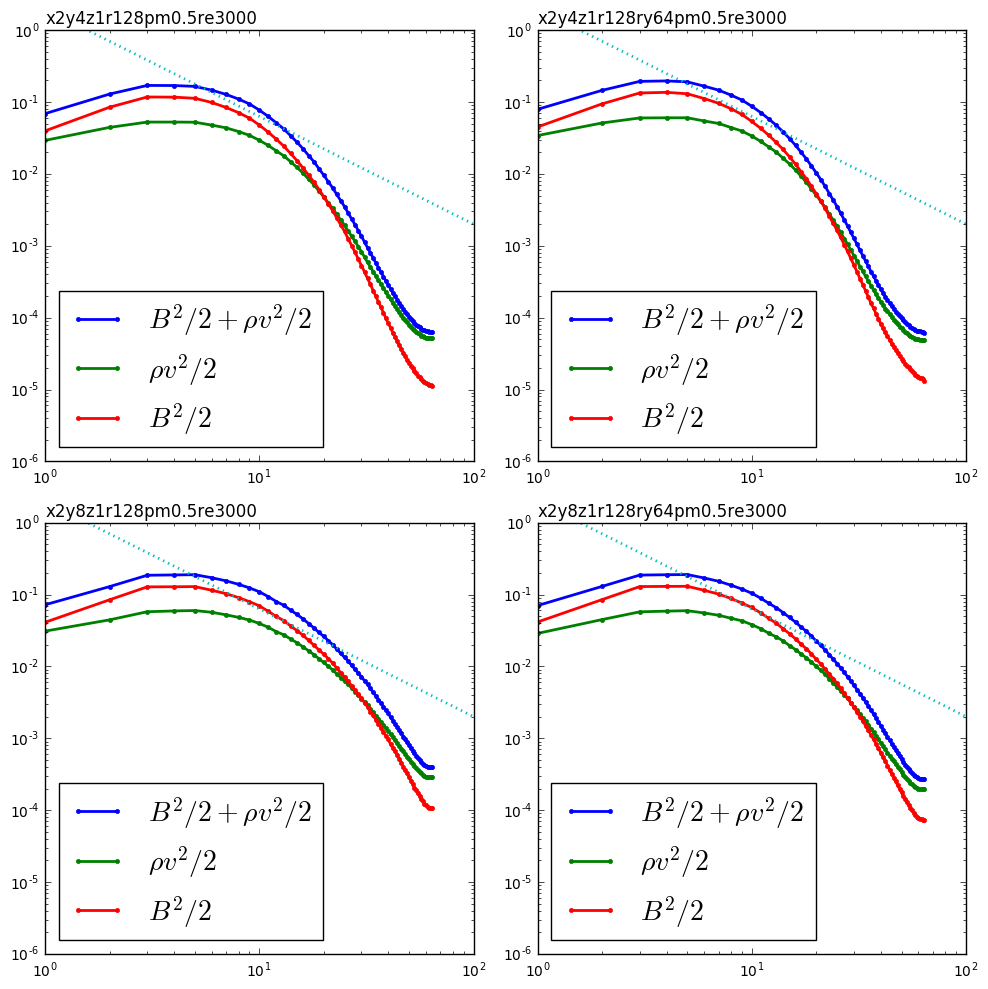

In [53]:
from powerspectra.pspec import plot_pspec1d
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
targlist = ['x2y4z1r128pm0.5re3000','x2y4z1r128ry64pm0.5re3000',\
            'x2y8z1r128pm0.5re3000','x2y8z1r128ry64pm0.5re3000']

matplotlib.rcParams['figure.figsize'] = (10,5*2)
cnt = 0
ts,te,tstride = 50,101,1
for targname in targlist:
  cnt +=1
  plt.subplot(2,2,cnt)
  plot_pspec1d(targname,ts,te,tstride)
  plt.title(targname,loc='left')
    
plt.tight_layout()

 summary of all boxes: power spectra
 * with Pm=0.5, kinetic energy dominates at small scale while magnetic energy dominates the large scale
 * x2y8z1 resolve small scale better than x2y4z1; r128(128/H) resolve small scale better than r128ry64 (64/H in y, 128/H else where), but not by much. 

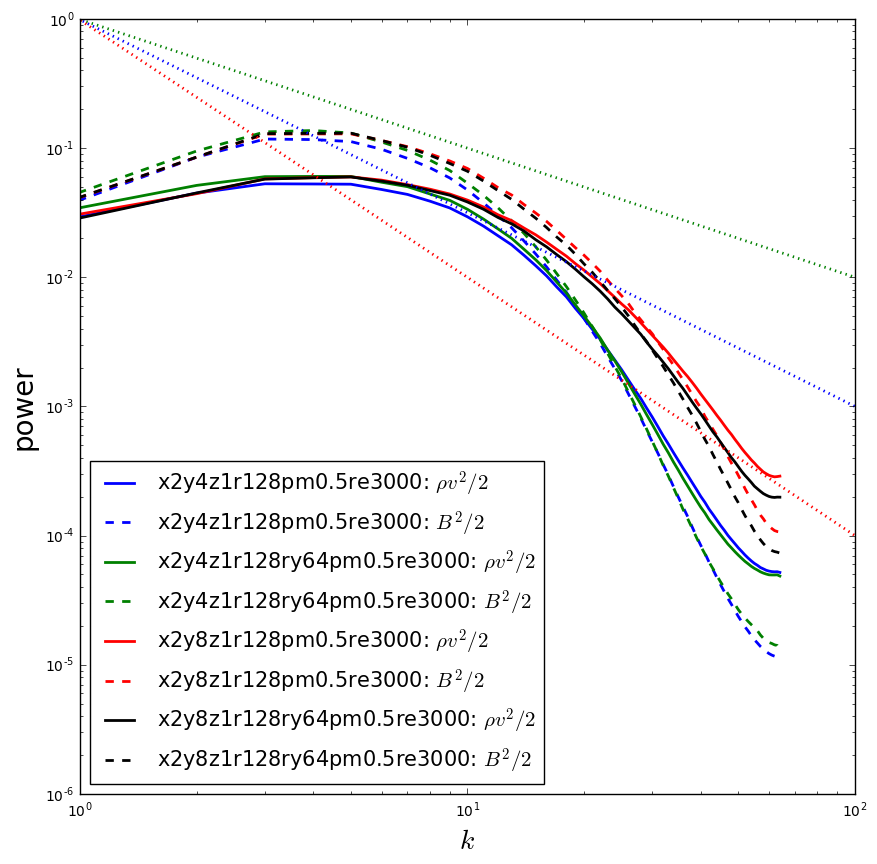

In [54]:
from powerspectra.pspec import get_pspec1d
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
targlist = ['x2y4z1r128pm0.5re3000','x2y4z1r128ry64pm0.5re3000',\
            'x2y8z1r128pm0.5re3000','x2y8z1r128ry64pm0.5re3000'] #,\
            #'x4y4z1r128pm0.5re3000']

clist = ['b','g','r','k','y']
cnt = 0
matplotlib.rcParams['figure.figsize'] = (10,10)
for targname in targlist:
  ts,te,tstride=50,100,1
  if targname == 'x4y4z1r128pm0.5re3000':
    ts,te,tstride=50,87,9
  k,pwra,pwrb = get_pspec1d(targname,ts,te,tstride)
  plt.plot(k,pwra,'-'+clist[cnt],lw=2,label=targname+': '+r'$\rho v^2/2$')
  plt.plot(k,pwrb,'--'+clist[cnt],lw=2,label=targname+': '+r'$B^2/2$')
  cnt +=1
plt.xscale('log')
plt.yscale('log')
plt.xlim([1,100])
plt.ylim([1e-6,1])
plt.xlabel(r'$k$',fontsize=20)
plt.ylabel('power',fontsize=20)
amp = 1
plt.plot(np.arange(0,100,0.1),amp*np.arange(0.01,100,0.1)**(-1.5),':',lw=2)
plt.plot(np.arange(0,100,0.1),amp*np.arange(0.01,100,0.1)**(-1),':',lw=2)
plt.plot(np.arange(0,100,0.1),amp*np.arange(0.01,100,0.1)**(-2),':',lw=2)
plt.legend(fontsize=15,loc=3)


* test the time dependence of the averaged power spectra, thick blue/green: 25 snapshots from the first half of t=25-50 orbits; thin red: the second half (also 25 snapshots)

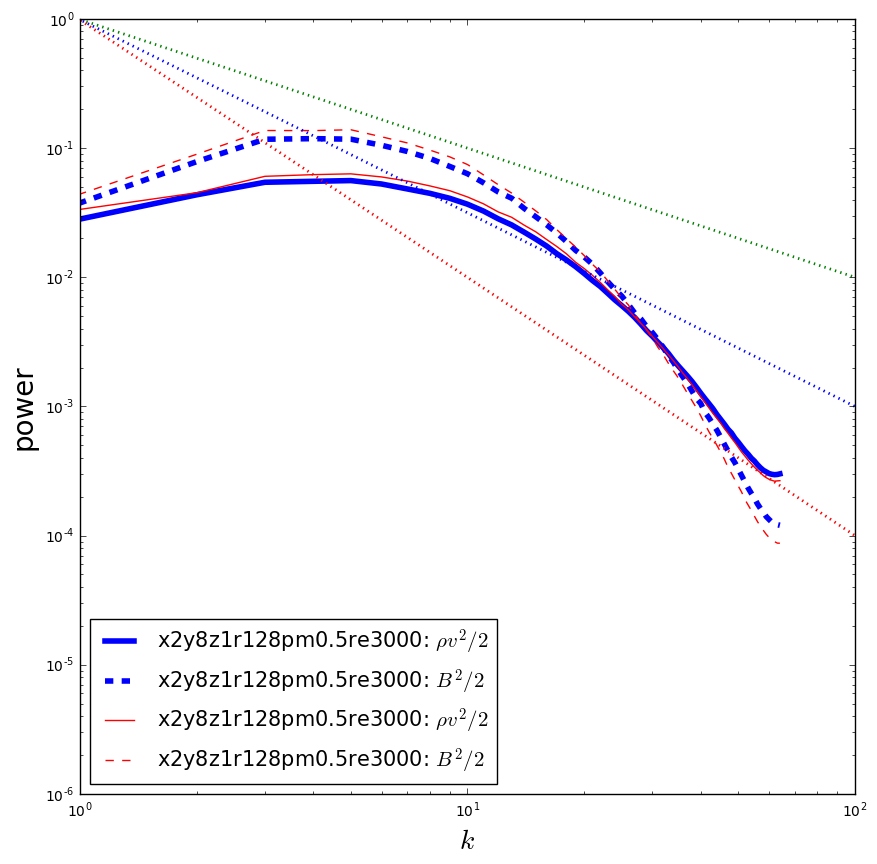

In [74]:
from powerspectra.pspec import get_pspec1d
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
targlist = ['x2y4z1r128pm0.5re3000','x2y4z1r128ry64pm0.5re3000',\
            'x2y8z1r128pm0.5re3000','x2y8z1r128ry64pm0.5re3000',\
            'x4y4z1r128pm0.5re3000']

clist = ['b','g','r','k','y']
cnt = 0

matplotlib.rcParams['figure.figsize'] = (10,10)
for targname in targlist[2:3:3]:
  ts,te,tstride=50,101,1
  if targname == 'x4y4z1r128pm0.5re3000':
    ts,te,tstride=50,87,9
  k,pwra,pwrb = get_pspec1d(targname,ts,76,tstride)
  plt.plot(k,pwra,'-'+clist[cnt],lw=4,label=targname+': '+r'$\rho v^2/2$')
  plt.plot(k,pwrb,'--'+clist[cnt],lw=4,label=targname+': '+r'$B^2/2$')
  # low time resol
  cnt +=1
  k,pwra,pwrb = get_pspec1d(targname,75,te,1)
  plt.plot(k,pwra,'-'+clist[2],lw=1,label=targname+': '+r'$\rho v^2/2$')
  plt.plot(k,pwrb,'--'+clist[2],lw=1,label=targname+': '+r'$B^2/2$')
 
plt.xscale('log')
plt.yscale('log')
plt.xlim([1,100])
plt.ylim([1e-6,1])
plt.xlabel(r'$k$',fontsize=20)
plt.ylabel('power',fontsize=20)
amp = 1
plt.plot(np.arange(0,100,0.1),amp*np.arange(0.01,100,0.1)**(-1.5),':',lw=2)
plt.plot(np.arange(0,100,0.1),amp*np.arange(0.01,100,0.1)**(-1),':',lw=2)
plt.plot(np.arange(0,100,0.1),amp*np.arange(0.01,100,0.1)**(-2),':',lw=2)
plt.legend(fontsize=15,loc=3)

## power spectra with  $B_y$ separated

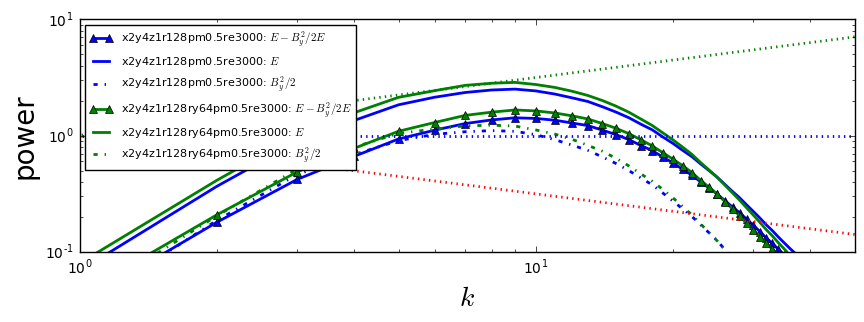

In [72]:
from powerspectra.pspec import get_pspec1d
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
targlist = ['x2y4z1r128pm0.5re3000','x2y4z1r128ry64pm0.5re3000',\
            'x2y8z1r128pm0.5re3000','x2y8z1r128ry64pm0.5re3000'] #,\
            #'x4y4z1r128pm0.5re3000']

clist = ['b','g','r','k','y']
cnt = 0
matplotlib.rcParams['figure.figsize'] = (10,3)
for targname in targlist[0:2]:
  ts,te,tstride=50,100,1
  if targname == 'x4y4z1r128pm0.5re3000':
    ts,te,tstride=50,87,9
  k,pwra,pwrb,pwrby = get_pspec1d(targname,ts,te,tstride,noby=True)
  f = k**1.5
  plt.plot(k,(pwra+pwrb)*f,'-^'+clist[cnt],lw=2,label=targname+': '+r'$E-B_y^2/2E$')
  plt.plot(k,(pwra+pwrby+pwrb)*f,'-'+clist[cnt],lw=2,label=targname+': '+r'$E$')
  #plt.plot(k,pwrb*f,'--'+clist[cnt],lw=2,label=targname+': '+r'$B^2/2$')
  plt.plot(k,pwrby*f,'-.'+clist[cnt],lw=2,label=targname+': '+r'$B_y^2/2$')
  cnt +=1
plt.xscale('log')
plt.yscale('log')
plt.xlim([1,50])
plt.ylim([1e-1,10])
plt.xlabel(r'$k$',fontsize=20)
plt.ylabel('power',fontsize=20)
amp = 1
plt.plot(np.arange(0,100,0.1),amp*np.arange(0.01,100,0.1)**(-1.5+1.5),':',lw=2)
plt.plot(np.arange(0,100,0.1),amp*np.arange(0.01,100,0.1)**(-1+1.5),':',lw=2)
plt.plot(np.arange(0,100,0.1),amp*np.arange(0.01,100,0.1)**(-2+1.5),':',lw=2)
plt.legend(fontsize=8,loc=2)

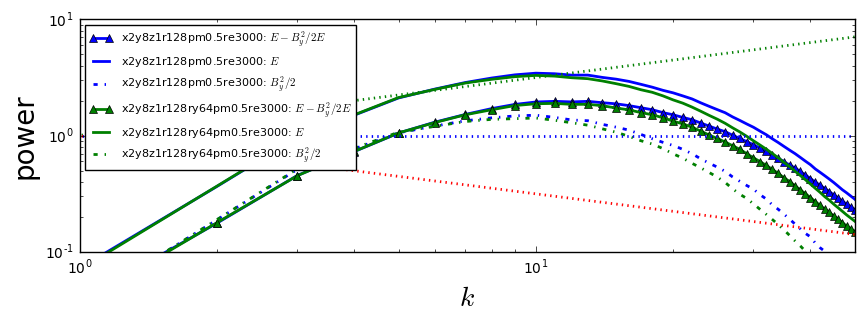

In [73]:
from powerspectra.pspec import get_pspec1d
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
targlist = ['x2y4z1r128pm0.5re3000','x2y4z1r128ry64pm0.5re3000',\
            'x2y8z1r128pm0.5re3000','x2y8z1r128ry64pm0.5re3000'] #,\
            #'x4y4z1r128pm0.5re3000']

clist = ['b','g','r','k','y']
cnt = 0
matplotlib.rcParams['figure.figsize'] = (10,3)
for targname in targlist[2:4]:
  ts,te,tstride=50,100,1
  if targname == 'x4y4z1r128pm0.5re3000':
    ts,te,tstride=50,87,9
  k,pwra,pwrb,pwrby = get_pspec1d(targname,ts,te,tstride,noby=True)
  f = k**1.5
  plt.plot(k,(pwra+pwrb)*f,'-^'+clist[cnt],lw=2,label=targname+': '+r'$E-B_y^2/2E$')
  plt.plot(k,(pwra+pwrby+pwrb)*f,'-'+clist[cnt],lw=2,label=targname+': '+r'$E$')
  #plt.plot(k,pwrb*f,'--'+clist[cnt],lw=2,label=targname+': '+r'$B^2/2$')
  plt.plot(k,pwrby*f,'-.'+clist[cnt],lw=2,label=targname+': '+r'$B_y^2/2$')
  cnt +=1
plt.xscale('log')
plt.yscale('log')
plt.xlim([1,50])
plt.ylim([1e-1,10])
plt.xlabel(r'$k$',fontsize=20)
plt.ylabel('power',fontsize=20)
amp = 1
plt.plot(np.arange(0,100,0.1),amp*np.arange(0.01,100,0.1)**(-1.5+1.5),':',lw=2)
plt.plot(np.arange(0,100,0.1),amp*np.arange(0.01,100,0.1)**(-1+1.5),':',lw=2)
plt.plot(np.arange(0,100,0.1),amp*np.arange(0.01,100,0.1)**(-2+1.5),':',lw=2)
plt.legend(fontsize=8,loc=2)

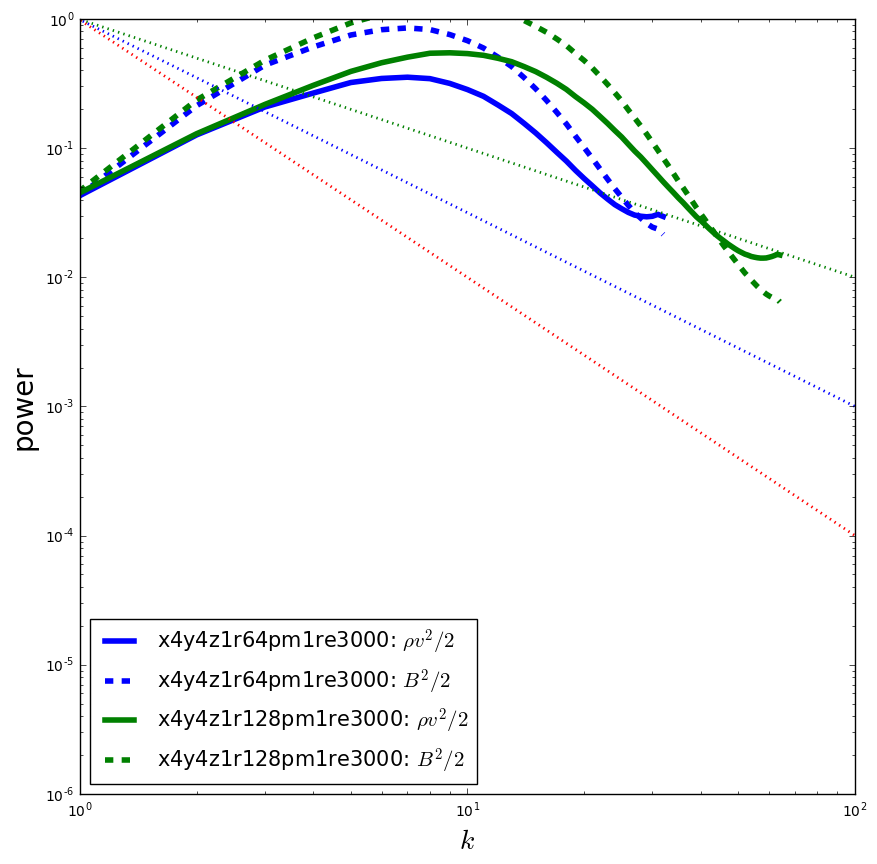

In [97]:
from powerspectra.pspec import get_pspec1d
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
targlist = ['x4y4z1r64pm1re3000','x4y4z1r128pm1re3000']

clist = ['b','g','r','k','y']
cnt = 0

matplotlib.rcParams['figure.figsize'] = (10,10)
for targname in targlist:
  ts,te,tstride=50,101,1
  if targname == 'x4y4z1r128pm1re3000':
    ts,te,tstride=50,79,1
  k,pwra,pwrb = get_pspec1d(targname,ts,te,tstride)
  plt.plot(k,pwra*k,'-'+clist[cnt],lw=4,label=targname+': '+r'$\rho v^2/2$')
  plt.plot(k,pwrb*k,'--'+clist[cnt],lw=4,label=targname+': '+r'$B^2/2$')
  cnt +=1
 
plt.xscale('log')
plt.yscale('log')
plt.xlim([1,100])
plt.ylim([1e-6,1])
plt.xlabel(r'$k$',fontsize=20)
plt.ylabel('power',fontsize=20)
amp = 1
plt.plot(np.arange(0,100,0.1),amp*np.arange(0.01,100,0.1)**(-1.5),':',lw=2)
plt.plot(np.arange(0,100,0.1),amp*np.arange(0.01,100,0.1)**(-1),':',lw=2)
plt.plot(np.arange(0,100,0.1),amp*np.arange(0.01,100,0.1)**(-2),':',lw=2)
plt.legend(fontsize=15,loc=3)

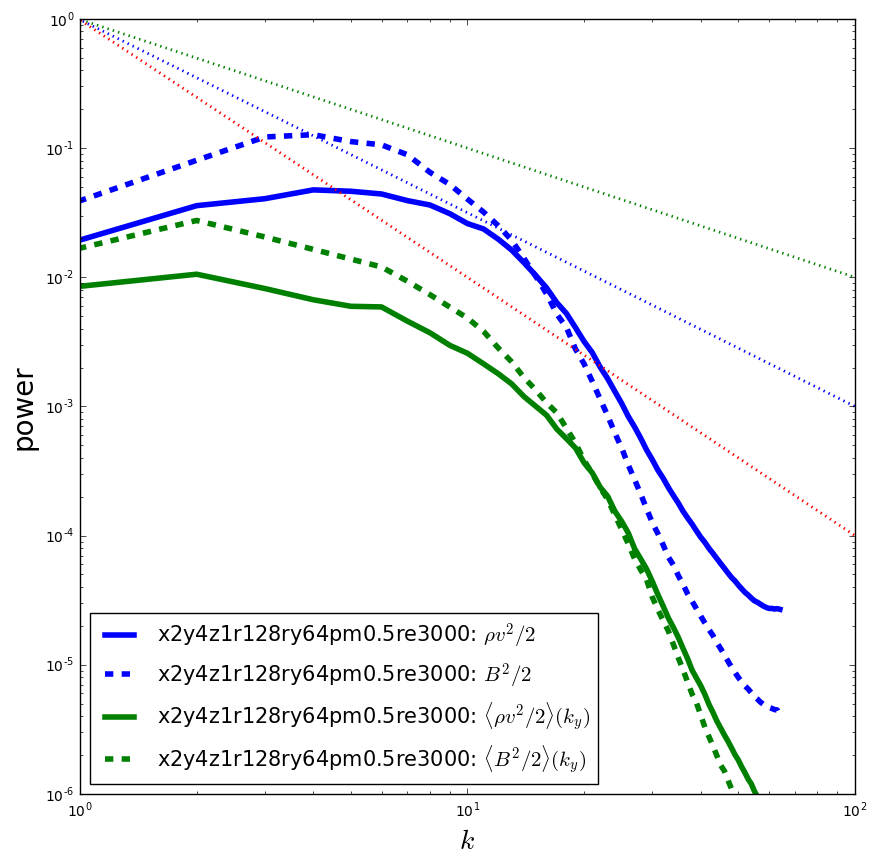

In [1]:
from powerspectra.pspec import get_pspec1dall
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
targlist = ['x2y4z1r128ry64pm0.5re3000']

clist = ['b','g','r','k','y']
cnt = 0

matplotlib.rcParams['figure.figsize'] = (10,10)
for targname in targlist:
  ts,te,tstride=50,51,1
  if targname == 'x4y4z1r128pm1re3000':
    ts,te,tstride=50,79,1
  k,kx,ky,kz,pwra,pwrb,pwrax,pwrbx,pwray,pwrby,pwraz,pwrbz = get_pspec1dall(targname,128,126,64,ts,te,tstride)
  plt.plot(k,pwra,'-'+clist[cnt],lw=4,label=targname+': '+r'$\rho v^2/2$')
  plt.plot(k,pwrb,'--'+clist[cnt],lw=4,label=targname+': '+r'$B^2/2$')
  cnt +=1
  plt.plot(ky,pwray,'-'+clist[cnt],lw=4,label=targname+': '+r'$\langle\rho v^2/2\rangle(k_y)$')
  plt.plot(ky,pwrby,'--'+clist[cnt],lw=4,label=targname+': '+r'$\langle B^2/2\rangle (k_y)$')
 
plt.xscale('log')
plt.yscale('log')
plt.xlim([1,100])
plt.ylim([1e-6,1])
plt.xlabel(r'$k$',fontsize=20)
plt.ylabel('power',fontsize=20)
amp = 1
plt.plot(np.arange(0,100,0.1),amp*np.arange(0.01,100,0.1)**(-1.5),':',lw=2)
plt.plot(np.arange(0,100,0.1),amp*np.arange(0.01,100,0.1)**(-1),':',lw=2)
plt.plot(np.arange(0,100,0.1),amp*np.arange(0.01,100,0.1)**(-2),':',lw=2)
plt.legend(fontsize=15,loc=3)

## study the numerical convergence
* 2x4x1  resol  64/H, 128/H and 256/H  
* Pm = 1, Re = 4000 fixed 
* Jobs are running, wait for collecting data 
* try to plot the power spectra

<type 'float'>
Run x2y4z1r64pm1re4000: <alpha> =  0.0948383950227 0.0257610462154 0.120599441238
Run x2y4z1r128pm1re4000: <alpha> =  0.109316527785 0.0268733626999 0.136189890485
Run x2y4z1r256pm1re4000: <alpha> =  0.0915500744539 0.021132610036 0.11268268449


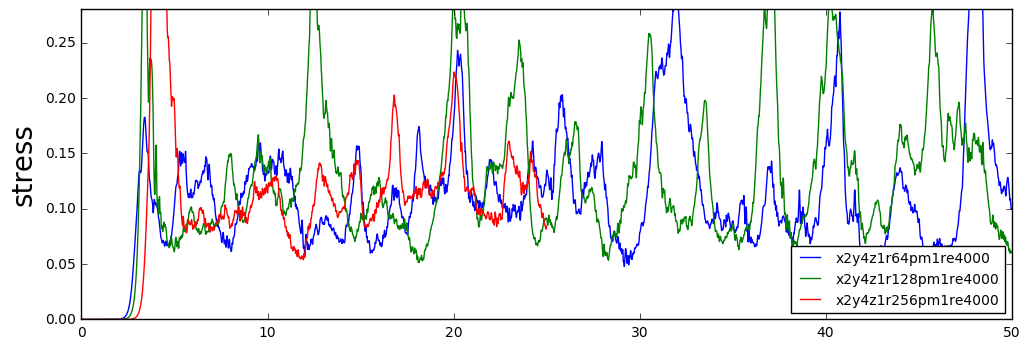

In [2]:
direname='/tigress/jiming/reconnect/athena/bin/'
basename='Unstra.out2.'
appdname='athdf'
histname='Unstra.hst'

omg=1.0
rho0=1.0
cs = 1.0
pres = rho0*cs**2
torb=2.*np.pi/omg

#list of target
targlist=[  'x2y4z1r64pm1re4000', 'x2y4z1r128pm1re4000',\
            'x2y4z1r256pm1re4000']
Lx,Ly,Lz=2.0,4.0,1.0
volume= Lx*Ly*Lz
print type(volume)
first_time=True
# load default history dump
matplotlib.rcParams['figure.figsize'] = (12,4)
for targname in targlist:
    fname=direname+targname+'/'+histname
    dtype1 = np.dtype([('time', 'f8'), ('em1', 'f8'),('em2','f8'),('em3','f8'),('maxwell','f8'),('reynolds','f8')])
    ahist = np.loadtxt(fname, dtype=dtype1, skiprows=2, usecols=(0,9,10,11,12,13))
    plt.plot(ahist['time']/torb,(ahist['maxwell']+ahist['reynolds'])/pres/volume,label=targname)
    size=int(len(ahist['maxwell'])*0.25)
    print 'Run '+targname+': <alpha> = ',np.average(ahist['maxwell'][size:])/pres/volume, \
                                         np.average(ahist['reynolds'][size:])/pres/volume, \
                                         np.average(ahist['maxwell'][size:]+ahist['reynolds'][size:])/pres/volume
    #plt.plot(ahist['time']/torb,ahist['reynolds']/pres/volume,label='reynolds')
#plt.yscale('log')
plt.ylim([0,0.28])
plt.xlim([0,50])
#plt.xlabel('Orbits',fontsize=20)
plt.ylabel('stress',fontsize=20)
plt.legend(fontsize=10,loc=4)






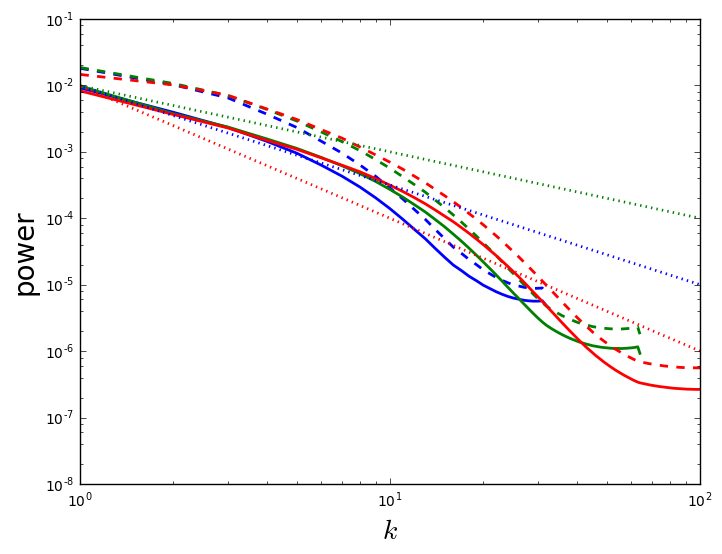

In [34]:
from powerspectra.pspec import get_pspec1d
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

prefac = 4.*np.pi*2*4*1
clist = ['b','g','r','k','y']
cnt = 0
matplotlib.rcParams['figure.figsize'] = (8,6)
for targname in targlist:
  ts,te,tstride=50,100,1
  if targname[6:9] == 'r64':
    nkx,nky,nkz = 64,63,32
  if targname[6:10] == 'r128':
    nkx,nky,nkz = 128,126,64
  if targname[6:10] == 'r256':
    nkx,nky,nkz,ts,te,tstride=256,252,128,30,51,1
  ## pwra -shell_int kinetic; pwrb - shell_int magnetic
  ## pwrax - yz_int kinetic along kx axis etc.
  k,kx,ky,kz,pwra,pwrb,pwrax,pwrbx,pwray,pwrby,pwraz,pwrbz = get_pspec1dall(targname,nkx,nky,nkz,ts,te,tstride)
  plt.plot(k,pwra*prefac,'-'+clist[cnt],lw=2,label=targname+': '+r'$\rho v^2/2$')
  plt.plot(k,pwrb*prefac,'--'+clist[cnt],lw=2,label=targname+': '+r'$B^2/2$')
  cnt +=1
plt.xscale('log')
plt.yscale('log')
plt.xlim([1,100])
plt.ylim([1e-8,0.1])
plt.xlabel(r'$k$',fontsize=20)
plt.ylabel('power',fontsize=20)
amp = 0.01
plt.plot(np.arange(0,100,0.1),amp*np.arange(0.01,100,0.1)**(-1.5),':',lw=2)
plt.plot(np.arange(0,100,0.1),amp*np.arange(0.01,100,0.1)**(-1),':',lw=2)
plt.plot(np.arange(0,100,0.1),amp*np.arange(0.01,100,0.1)**(-2),':',lw=2)
#plt.legend(fontsize=15,loc=0)


In [27]:
def my_mod(x,y):
  r = x - y*int(x/y);
  if r > 0.5*y:
    r -= y;
  elif r < -0.5*y:
    r += y
  return r


In [22]:
def my_mod2(x,y):
    nr = np.rint(x/y)
    r = x - np.float64(nr)*y
    return r

In [29]:
x=np.arange(0,10,0.1)
y = 0.7
for ix in x:
  print my_mod(ix,y), my_mod(ix,y)

0.0 0.0
0.1 0.1
0.2 0.2
0.3 0.3
-0.3 -0.3
-0.2 -0.2
-0.1 -0.1
1.11022302463e-16 1.11022302463e-16
0.1 0.1
0.2 0.2
0.3 0.3
-0.3 -0.3
-0.2 -0.2
-0.1 -0.1
2.22044604925e-16 2.22044604925e-16
0.1 0.1
0.2 0.2
0.3 0.3
-0.3 -0.3
-0.2 -0.2
-0.1 -0.1
4.4408920985e-16 4.4408920985e-16
0.1 0.1
0.2 0.2
0.3 0.3
-0.3 -0.3
-0.2 -0.2
-0.1 -0.1
4.4408920985e-16 4.4408920985e-16
0.1 0.1
0.2 0.2
0.3 0.3
-0.3 -0.3
-0.2 -0.2
-0.1 -0.1
0.0 0.0
0.1 0.1
0.2 0.2
0.3 0.3
-0.3 -0.3
-0.2 -0.2
-0.1 -0.1
8.881784197e-16 8.881784197e-16
0.1 0.1
0.2 0.2
0.3 0.3
-0.3 -0.3
-0.2 -0.2
-0.1 -0.1
8.881784197e-16 8.881784197e-16
0.1 0.1
0.2 0.2
0.3 0.3
-0.3 -0.3
-0.2 -0.2
-0.1 -0.1
8.881784197e-16 8.881784197e-16
0.1 0.1
0.2 0.2
0.3 0.3
-0.3 -0.3
-0.2 -0.2
-0.1 -0.1
8.881784197e-16 8.881784197e-16
0.1 0.1
0.2 0.2
0.3 0.3
-0.3 -0.3
-0.2 -0.2
-0.1 -0.1
0.0 0.0
0.1 0.1
0.2 0.2
0.3 0.3
-0.3 -0.3
-0.2 -0.2
-0.1 -0.1
8.881784197e-16 8.881784197e-16
0.1 0.1
0.2 0.2
0.3 0.3
-0.3 -0.3
-0.2 -0.2
-0.1 -0.1
1.7763568394e-15 1.776356839